In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import numpy as np

# Importing libraries for plotting Q-Q plot
import scipy.stats as stat
import pylab

# Importing Standard Scalar for Normalization
from sklearn.preprocessing import StandardScaler

# Importing LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression

# Importing the metric R-square, Mean absolute error, Mean-squared error for evaluation
from sklearn.metrics import r2_score, mean_absolute_error,  mean_squared_error

# Importing warnings for ignoring any warnings in the program
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading dataset----Using Outlier treated dataset
car_reg = pd.read_csv("Car_Preprocess_Outlier.csv")
#----Regression sensitive towards outliers

# Viewing the dataset
car_reg.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [4]:
# Function for plotting Q-Q Plot----Visualizing data distribution
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist="norm", plot=pylab)
    plt.show()

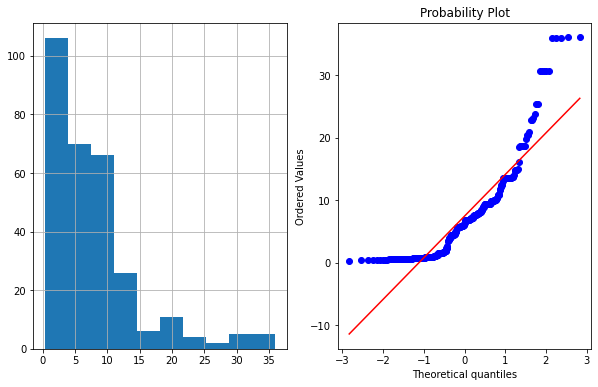

In [5]:
plot_data(car_reg, "Present_Price")

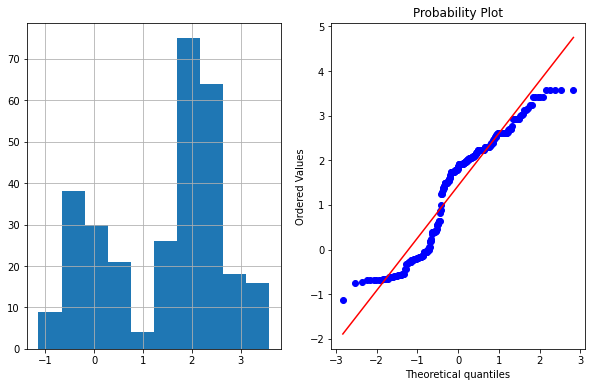

In [6]:
# Performing Lograthimic Transformation on feature "Present_Price"-Linear Regression assumes data to be normally distributed
car_reg["Present_Price_Log"] = np.log(car_reg["Present_Price"])
plot_data(car_reg, "Present_Price_Log")

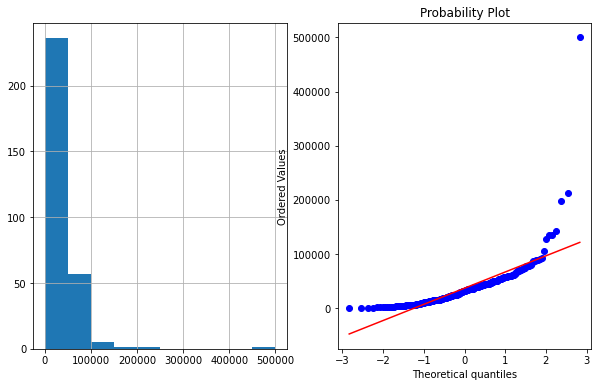

In [7]:
plot_data(car_reg, "Kms_Driven")

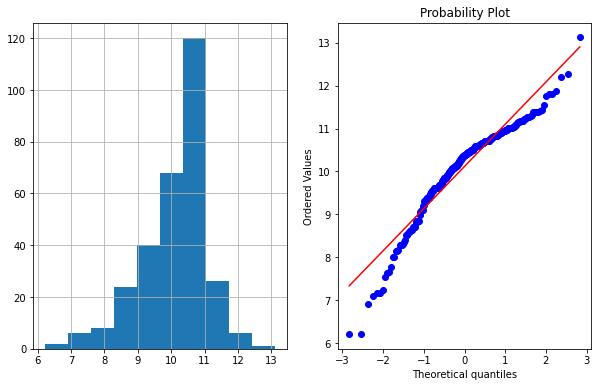

In [8]:
# Performing Lograthimic Transformation on feature "Kms_Driven"----Linear Regression assumes data to be normally distributed
car_reg["Kms_Driven_Log"] = np.log(car_reg["Kms_Driven"])
plot_data(car_reg, "Kms_Driven_Log")

In [9]:
# Dropping the non-transformed features
car_reg.drop(["Present_Price", "Kms_Driven"], axis=1, inplace=True)
car_reg.head()

,Selling_Price,Owner,Years_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Present_Price_Log,Kms_Driven_Log
0,3.35,0,6,0,1,0,1,1.720979,10.203592
1,4.75,0,7,1,0,0,1,2.255493,10.668955
2,7.25,0,3,0,1,0,1,2.287471,8.839277
3,2.85,0,9,0,1,0,1,1.423108,8.556414
4,4.60,0,6,1,0,0,1,1.927164,10.656082


In [10]:
# Separating the independent and dependent features
X_data = car_reg.iloc[:,1:]
y_data = car_reg["Selling_Price"]

# Finding shape of independent and dependent variables
X_data.shape, y_data.shape

((301, 8), (301,))

In [11]:
# Performing normalisation using Standard Scaler
scale = StandardScaler()
X_data_std = scale.fit_transform(X_data)
#----Applied to independent features only

<AxesSubplot:>

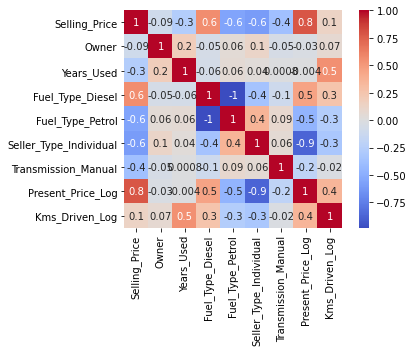

In [12]:
# Plotting Correlation Matrix using Heatmap -->>Finding the co-relation between each features.
sns.heatmap(car_reg.corr(), annot=True, fmt=".1g", square=True, cmap="coolwarm")

In [13]:
# Checking for Multicollinearity between features
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_data_std

vif = pd.DataFrame()
vif["Features"] = X_data.columns
vif["VIF_Values"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif
# Thumb Rule: VIF exceeding 5 or 10 indicates high multicollinearity.

#----Encoded features show high VIF values but it doesnot indicate multicolinearity

,Features,VIF_Values
0,Owner,1.081740
1,Years_Used,1.632523
2,Fuel_Type_Diesel,25.144437
3,Fuel_Type_Petrol,25.056835
4,Seller_Type_Individual,4.663833
5,Transmission_Manual,1.097341
6,Present_Price_Log,5.233440
7,Kms_Driven_Log,1.849245


In [14]:
# Importing KFold cross-validation for splitting dataset 
from sklearn.model_selection import KFold

# Creating object of KFold
kf = KFold(n_splits = 7, shuffle = True, random_state = None) #----Performing 5-Fold cross-validation

In [15]:
# Splittting dataset into training and testing part using cross-validation
for train_index, test_index in kf.split(X_data):
    X_train, X_test = X_data.iloc[train_index,:], X_data.iloc[test_index,:]
    y_train, y_test = y_data.iloc[train_index], y_data.iloc[test_index]

# Finding out the shape of training and testing set
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((258, 8), (43, 8))

((258,), (43,))

In [16]:
# Creating the object of LinearRegression Class
reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

# Fititng (Training) the model to the dataset
reg.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [17]:
# Finding out the slope and intercept terms after fiting the model
print("Slope: %.3f" %reg.coef_[0]) #----Slope
print("Intercept: %.3f" %reg.intercept_) #----Intercept

Slope: -1.121
Intercept: 3.386


In [18]:
# Prediction
y_pred = reg.predict(X_test) #----Prediction on testing set
y_train_pred = reg.predict(X_train) #----Prediction on training set

In [19]:
# Creating a new dataframe having actual and predicted values
comp_df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
comp_df.head()
#---Used for comparision purpose

,Actual,Predicted
4,4.60,7.104666
8,8.75,8.797206
14,2.25,2.807867
21,4.90,5.311614
26,4.15,3.595818


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

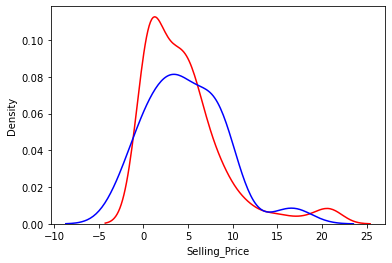

In [20]:
# Visualising the comparision between Actual and Predicted values
ax_1 = sns.distplot(car_reg["Selling_Price"], hist = False, color = "r", label = "Actual_Value")
sns.distplot(y_pred, hist = False, color = "b", label = "Fitted_Value", ax = ax_1)

In [21]:
# Function for calculating Adjusted R-square
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

In [22]:
# Model Evaluation using R-square 
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_pred)))

# Model Evaluation using Adjusted R-square
print('Adjusted R^2 train: %.3f, test: %.3f' %(adj_r2(X_train,y_train),adj_r2(X_test,y_test)))

R^2 train: 0.797, test: 0.825
Adjusted R^2 train: 0.790, test: 0.783


In [23]:
# Model Evaluation using Mean Absolute Error
print('Mean Absolute Error: train: %.3f, test: %.3f' %(mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_test, y_pred)))

# Model Evaluation using Root Mean Squared (RMSE) Error
print('Root Mean Squared Error: train: %.3f, test: %.3f' %(sqrt(mean_absolute_error(y_train, y_train_pred)),sqrt(mean_absolute_error(y_test, y_pred))))

Mean Absolute Error: train: 1.500, test: 1.356
Root Mean Squared Error: train: 1.225, test: 1.164
